In [17]:
%load_ext autoreload
%autoreload 2

import polars as pl
import networkx as nx
import numpy as np

from src.base_classes.omic_data_loader import OmicDataLoader
from src.data_managers.concat import CatOmicDataManager

from src.gnn_utils.interactions import (
    get_mirna_genes_circrna_interactions,
    get_mirna_gene_interactions,
    gg_interactions,
    pp_interactions,
    tf_links
)
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
mrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_risk/mrna",
)
mirna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_risk/mirna_genes",
)
circrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_risk/circrna",
)
# pirna_loader = OmicDataLoader(
#     data_dir="mds_data/splits_74/pirna",
# )
te_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_risk/te_counts",
)

omic_data_loaders = {
    "mrna": mrna_loader,
    "mirna": mirna_loader,
    "circrna": circrna_loader,
    # # # "pirna": pirna_loader,
    # "te": te_loader,
}
odm = CatOmicDataManager(omic_data_loaders, n_splits=5)

In [21]:
from src.evals.xgboost import XGBoostEvaluator

xgb_eval = XGBoostEvaluator(
    data_manager=odm,
    n_trials=80,
    verbose=True,
)
_ = xgb_eval.evaluate()
xgb_eval.print_best_results()
xgb_eval.print_best_parameters()
# xgb_eval.save_results(results_file=save_folder, row_name="XGBoost")

[I 2024-12-12 16:22:07,202] A new study created in memory with name: no-name-53889654-7695-45ba-90f3-e7912394756c
[I 2024-12-12 16:22:07,425] Trial 0 finished with value: 0.2149085674931129 and parameters: {'booster': 'dart', 'lambda': 0.4057461296422888, 'alpha': 0.26894822723091494, 'max_depth': 3, 'eta': 5.470886957221293e-06, 'gamma': 0.10971176184879022, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 2.583678552114481e-05, 'skip_drop': 0.10659298058193127}. Best is trial 0 with value: 0.2149085674931129.
[I 2024-12-12 16:22:07,610] Trial 1 finished with value: 0.21534604040404037 and parameters: {'booster': 'gbtree', 'lambda': 1.1788352502470514e-05, 'alpha': 8.954191583242451e-05, 'max_depth': 7, 'eta': 0.0004173033818890183, 'gamma': 8.219366233494736e-05, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 0.21534604040404037.


New best score: 0.215
Best model performance:
Accuracy: 0.620 ± 0.073
F1 Macro: 0.582 ± 0.133
F1 Weighted: 0.595 ± 0.108
[{'acc': 0.6363636363636364, 'f1_macro': np.float64(0.6333333333333333), 'f1_weighted': np.float64(0.6363636363636364)}, {'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weighted': np.float64(0.7272727272727273)}, {'acc': 0.6363636363636364, 'f1_macro': np.float64(0.6333333333333333), 'f1_weighted': np.float64(0.6303030303030303)}, {'acc': 0.5, 'f1_macro': np.float64(0.3333333333333333), 'f1_weighted': np.float64(0.4)}, {'acc': 0.6, 'f1_macro': np.float64(0.5833333333333333), 'f1_weighted': np.float64(0.5833333333333333)}]
New best score: 0.215
Best model performance:
Accuracy: 0.620 ± 0.073
F1 Macro: 0.582 ± 0.133
F1 Weighted: 0.597 ± 0.109
[{'acc': 0.6363636363636364, 'f1_macro': np.float64(0.6333333333333333), 'f1_weighted': np.float64(0.6363636363636364)}, {'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weigh

[I 2024-12-12 16:22:07,831] Trial 2 finished with value: 0.2149085674931129 and parameters: {'booster': 'dart', 'lambda': 4.055844667929524e-08, 'alpha': 0.3259323830722231, 'max_depth': 7, 'eta': 3.799571020798771e-08, 'gamma': 3.392986358840762e-05, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 4.160177706674547e-06, 'skip_drop': 4.181369269730115e-07}. Best is trial 1 with value: 0.21534604040404037.
[I 2024-12-12 16:22:08,019] Trial 3 finished with value: 0.21534604040404037 and parameters: {'booster': 'gbtree', 'lambda': 0.038495651562320155, 'alpha': 1.3952816638454487e-05, 'max_depth': 3, 'eta': 0.003087022383307502, 'gamma': 8.716810435396551e-08, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 0.21534604040404037.
[I 2024-12-12 16:22:08,205] Trial 4 finished with value: 0.2523998390074793 and parameters: {'booster': 'dart', 'lambda': 0.046040621771765274, 'alpha': 0.13482914962413695, 'max_depth': 1, 'eta': 1.633807930

New best score: 0.252
Best model performance:
Accuracy: 0.642 ± 0.032
F1 Macro: 0.625 ± 0.029
F1 Weighted: 0.629 ± 0.037
[{'acc': 0.6363636363636364, 'f1_macro': np.float64(0.6333333333333333), 'f1_weighted': np.float64(0.6363636363636364)}, {'acc': 0.6363636363636364, 'f1_macro': np.float64(0.6071428571428572), 'f1_weighted': np.float64(0.5974025974025974)}, {'acc': 0.6363636363636364, 'f1_macro': np.float64(0.6333333333333333), 'f1_weighted': np.float64(0.6363636363636364)}, {'acc': 0.7, 'f1_macro': np.float64(0.6703296703296704), 'f1_weighted': np.float64(0.6901098901098901)}, {'acc': 0.6, 'f1_macro': np.float64(0.5833333333333333), 'f1_weighted': np.float64(0.5833333333333333)}]


[I 2024-12-12 16:22:08,537] Trial 5 finished with value: 0.2149085674931129 and parameters: {'booster': 'dart', 'lambda': 0.5424016243194194, 'alpha': 2.4665368517993203e-08, 'max_depth': 4, 'eta': 2.5598624888806842e-05, 'gamma': 0.00012015044257982456, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 5.537883474197018e-05, 'skip_drop': 0.0005776572997138028}. Best is trial 4 with value: 0.2523998390074793.
[I 2024-12-12 16:22:08,772] Trial 6 finished with value: 0.2149085674931129 and parameters: {'booster': 'dart', 'lambda': 0.00018531893930826985, 'alpha': 2.875664602067832e-07, 'max_depth': 7, 'eta': 4.698456023115026e-08, 'gamma': 0.36685859800182424, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.007747332883932857, 'skip_drop': 1.8351410270227154e-06}. Best is trial 4 with value: 0.2523998390074793.
[I 2024-12-12 16:22:08,964] Trial 7 finished with value: 0.2149085674931129 and par

New best score: 0.330
Best model performance:
Accuracy: 0.700 ± 0.061
F1 Macro: 0.685 ± 0.051
F1 Weighted: 0.688 ± 0.059
[{'acc': 0.6363636363636364, 'f1_macro': np.float64(0.6333333333333333), 'f1_weighted': np.float64(0.6303030303030303)}, {'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weighted': np.float64(0.7272727272727273)}, {'acc': 0.6363636363636364, 'f1_macro': np.float64(0.6333333333333333), 'f1_weighted': np.float64(0.6303030303030303)}, {'acc': 0.8, 'f1_macro': np.float64(0.7619047619047619), 'f1_weighted': np.float64(0.7809523809523808)}, {'acc': 0.7, 'f1_macro': np.float64(0.6703296703296704), 'f1_weighted': np.float64(0.6703296703296703)}]


[I 2024-12-12 16:22:09,766] Trial 12 finished with value: 0.3299285598317766 and parameters: {'booster': 'gblinear', 'lambda': 0.0013294321353930715, 'alpha': 0.0016153767212842697}. Best is trial 10 with value: 0.3299285598317766.
[I 2024-12-12 16:22:09,913] Trial 13 finished with value: 0.30539138970798224 and parameters: {'booster': 'gblinear', 'lambda': 0.0006939213311628144, 'alpha': 0.0006561199911795711}. Best is trial 10 with value: 0.3299285598317766.
[I 2024-12-12 16:22:10,045] Trial 14 finished with value: 0.3050129034313449 and parameters: {'booster': 'gblinear', 'lambda': 0.003106779549873533, 'alpha': 4.170132399512292e-06}. Best is trial 10 with value: 0.3299285598317766.
[I 2024-12-12 16:22:10,197] Trial 15 finished with value: 0.3299285598317766 and parameters: {'booster': 'gblinear', 'lambda': 0.009021392420397454, 'alpha': 0.0015564592544395732}. Best is trial 10 with value: 0.3299285598317766.
[I 2024-12-12 16:22:10,325] Trial 16 finished with value: 0.3847574334388

New best score: 0.385
Best model performance:
Accuracy: 0.735 ± 0.072
F1 Macro: 0.721 ± 0.079
F1 Weighted: 0.726 ± 0.076
[{'acc': 0.8181818181818182, 'f1_macro': np.float64(0.8166666666666667), 'f1_weighted': np.float64(0.8181818181818182)}, {'acc': 0.8181818181818182, 'f1_macro': np.float64(0.8166666666666667), 'f1_weighted': np.float64(0.8151515151515153)}, {'acc': 0.6363636363636364, 'f1_macro': np.float64(0.6333333333333333), 'f1_weighted': np.float64(0.6363636363636364)}, {'acc': 0.7, 'f1_macro': np.float64(0.6703296703296704), 'f1_weighted': np.float64(0.6901098901098901)}, {'acc': 0.7, 'f1_macro': np.float64(0.6703296703296704), 'f1_weighted': np.float64(0.6703296703296703)}]


[I 2024-12-12 16:22:10,599] Trial 18 finished with value: 0.35677091719566123 and parameters: {'booster': 'gblinear', 'lambda': 1.928627165600704e-06, 'alpha': 0.027860405804466897}. Best is trial 16 with value: 0.3847574334388001.
[I 2024-12-12 16:22:10,752] Trial 19 finished with value: 0.07498688884758245 and parameters: {'booster': 'gblinear', 'lambda': 0.0001861556438586103, 'alpha': 0.8700217802840099}. Best is trial 16 with value: 0.3847574334388001.
[I 2024-12-12 16:22:10,904] Trial 20 finished with value: 0.3299285598317766 and parameters: {'booster': 'gblinear', 'lambda': 5.1385107025598e-08, 'alpha': 0.0002393702344503053}. Best is trial 16 with value: 0.3847574334388001.
[I 2024-12-12 16:22:11,046] Trial 21 finished with value: 0.3847574334388001 and parameters: {'booster': 'gblinear', 'lambda': 1.0328994046433654e-06, 'alpha': 0.015878161962045837}. Best is trial 16 with value: 0.3847574334388001.
[I 2024-12-12 16:22:11,190] Trial 22 finished with value: 0.3847574334388001

New best score: 0.391
Best model performance:
Accuracy: 0.736 ± 0.067
F1 Macro: 0.728 ± 0.070
F1 Weighted: 0.730 ± 0.070
[{'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weighted': np.float64(0.7272727272727273)}, {'acc': 0.8181818181818182, 'f1_macro': np.float64(0.8166666666666667), 'f1_weighted': np.float64(0.8151515151515153)}, {'acc': 0.6363636363636364, 'f1_macro': np.float64(0.6333333333333333), 'f1_weighted': np.float64(0.6363636363636364)}, {'acc': 0.8, 'f1_macro': np.float64(0.7916666666666667), 'f1_weighted': np.float64(0.8)}, {'acc': 0.7, 'f1_macro': np.float64(0.6703296703296704), 'f1_weighted': np.float64(0.6703296703296703)}]


[I 2024-12-12 16:22:12,952] Trial 34 finished with value: 0.07498688884758245 and parameters: {'booster': 'gblinear', 'lambda': 5.409351955091076e-08, 'alpha': 0.3281495811224253}. Best is trial 32 with value: 0.39115991610151724.
[I 2024-12-12 16:22:13,140] Trial 35 finished with value: 0.2715318063914107 and parameters: {'booster': 'gbtree', 'lambda': 7.246249734739238e-07, 'alpha': 0.0005388370973405308, 'max_depth': 9, 'eta': 0.723279348797977, 'gamma': 0.012670934902449927, 'grow_policy': 'depthwise'}. Best is trial 32 with value: 0.39115991610151724.
[I 2024-12-12 16:22:13,320] Trial 36 finished with value: 0.2149085674931129 and parameters: {'booster': 'dart', 'lambda': 0.06027473023748699, 'alpha': 0.040525145090348255, 'max_depth': 2, 'eta': 0.033503679118543114, 'gamma': 1.904442198308307e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.9891582408475649, 'skip_drop': 2.1703616250995755e-08}. Best is trial 32 with value: 0.391

New best score: 0.403
Best model performance:
Accuracy: 0.753 ± 0.083
F1 Macro: 0.729 ± 0.108
F1 Weighted: 0.734 ± 0.110
[{'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weighted': np.float64(0.7272727272727273)}, {'acc': 0.8181818181818182, 'f1_macro': np.float64(0.8166666666666667), 'f1_weighted': np.float64(0.8181818181818182)}, {'acc': 0.8181818181818182, 'f1_macro': np.float64(0.8166666666666667), 'f1_weighted': np.float64(0.8181818181818182)}, {'acc': 0.8, 'f1_macro': np.float64(0.7619047619047619), 'f1_weighted': np.float64(0.7809523809523808)}, {'acc': 0.6, 'f1_macro': np.float64(0.5238095238095238), 'f1_weighted': np.float64(0.5238095238095238)}]


[I 2024-12-12 16:22:15,892] Trial 52 finished with value: 0.3305099711477334 and parameters: {'booster': 'gblinear', 'lambda': 0.1239893356772677, 'alpha': 0.0035720233531834414}. Best is trial 50 with value: 0.402743874269768.
[I 2024-12-12 16:22:16,044] Trial 53 finished with value: 0.3734019041622159 and parameters: {'booster': 'gblinear', 'lambda': 0.6831570521159317, 'alpha': 0.13052438968719118}. Best is trial 50 with value: 0.402743874269768.
[I 2024-12-12 16:22:16,181] Trial 54 finished with value: 0.402743874269768 and parameters: {'booster': 'gblinear', 'lambda': 0.23764828363201665, 'alpha': 0.05912382386608739}. Best is trial 50 with value: 0.402743874269768.
[I 2024-12-12 16:22:16,330] Trial 55 finished with value: 0.07498688884758245 and parameters: {'booster': 'gblinear', 'lambda': 0.2768281664649017, 'alpha': 0.5196281058525857}. Best is trial 50 with value: 0.402743874269768.
[I 2024-12-12 16:22:16,519] Trial 56 finished with value: 0.2149085674931129 and parameters: {

New best score: 0.415
Best model performance:
Accuracy: 0.753 ± 0.054
F1 Macro: 0.740 ± 0.066
F1 Weighted: 0.744 ± 0.062
[{'acc': 0.8181818181818182, 'f1_macro': np.float64(0.8166666666666667), 'f1_weighted': np.float64(0.8181818181818182)}, {'acc': 0.8181818181818182, 'f1_macro': np.float64(0.8166666666666667), 'f1_weighted': np.float64(0.8151515151515153)}, {'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weighted': np.float64(0.7272727272727273)}, {'acc': 0.7, 'f1_macro': np.float64(0.6703296703296704), 'f1_weighted': np.float64(0.6901098901098901)}, {'acc': 0.7, 'f1_macro': np.float64(0.6703296703296704), 'f1_weighted': np.float64(0.6703296703296703)}]


[I 2024-12-12 16:22:17,694] Trial 64 finished with value: 0.33046566481996803 and parameters: {'booster': 'gblinear', 'lambda': 0.001509461368462016, 'alpha': 0.005945545854285009}. Best is trial 62 with value: 0.4146797854017747.
[I 2024-12-12 16:22:17,840] Trial 65 finished with value: 0.07498688884758245 and parameters: {'booster': 'gblinear', 'lambda': 0.0003004154180429475, 'alpha': 0.6019662211663412}. Best is trial 62 with value: 0.4146797854017747.
[I 2024-12-12 16:22:17,968] Trial 66 finished with value: 0.38524225167290765 and parameters: {'booster': 'gblinear', 'lambda': 0.00549840580420608, 'alpha': 0.021414838042139728}. Best is trial 62 with value: 0.4146797854017747.
[I 2024-12-12 16:22:18,193] Trial 67 finished with value: 0.21534604040404037 and parameters: {'booster': 'dart', 'lambda': 0.00573294120220337, 'alpha': 0.09092458630395499, 'max_depth': 8, 'eta': 0.0642898977481123, 'gamma': 0.00041524999779674266, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'nor

Best model performance:
Accuracy: 0.753 ± 0.054
F1 Macro: 0.740 ± 0.066
F1 Weighted: 0.744 ± 0.062
Best hyperparameters:
{'booster': 'gblinear', 'lambda': 0.0009007408593699541, 'alpha': 0.01401625886951651}


In [22]:
feat_importances = xgb_eval.get_feature_importances(xgb_eval.best_params)

fi_sorted = dict(sorted(feat_importances.items(), key=lambda x: abs(x[1]), reverse=True))

{'acc': 0.8181818181818182, 'f1_macro': np.float64(0.8166666666666667), 'f1_weighted': np.float64(0.8181818181818182)}
{'ENSG00000239839': [0.38047727942466736, -0.356097012758255], 'ENSG00000064687': [0.00026656995760276914, -0.00040179057396017015], 'ENSG00000254995': [-0.0006574445869773626, 0.0006502361502498388], 'ENSG00000240247': [0.15297645330429077, -0.11119737476110458], 'ENSG00000163221': [0.23033440113067627, -0.20281295478343964], 'ENSG00000206047': [0.05446198210120201, -0.035946015268564224], 'ENSG00000122224': [0.23109041154384613, -0.22493819892406464], 'ENSG00000188153': [-0.24022984504699707, 0.23285269737243652], 'ENSG00000233822': [0.3006872236728668, -0.2653878629207611], 'ENSG00000091181': [0.04774503409862518, -0.04665199667215347], 'ENSG00000138131': [1.3247710739960894e-05, -2.784993739624042e-05], 'ENSG00000075275': [0.1283620148897171, -0.12988659739494324], 'ENSG00000106976': [-0.08479155600070953, 0.08472488820552826], 'ENSG00000111249': [0.080314368009567

In [23]:
mrna = pl.read_csv("mds_data/preprocessed_74/mrna.csv")
mirna = pl.read_csv("mds_data/preprocessed_74/mirna_genes.csv")

mrna_gene = mrna.select("GENE_NAME", "GENE_ID")
mirna_gene = mirna.select("GENE_NAME", "GENE_ID")

# create one big dict to go from id to name
mrna_dict = dict(zip(mrna_gene["GENE_ID"], mrna_gene["GENE_NAME"]))
mirna_dict = dict(zip(mirna_gene["GENE_ID"], mirna_gene["GENE_NAME"]))

# merge the dicts
mrna_dict.update(mirna_dict)

# rename the keys from fi_sorted to the name of the gene if it exists in mrna_dict
fi_nn = {mrna_dict.get(k, k): v for k, v in fi_sorted.items()}

In [24]:
te = pl.read_csv("mds_data/preprocessed_74/te_counts.csv")
te_names = te['TE'].to_list()

# add "TE: " to all te features
te_names = {x : f"TE: {x}" for x in te_names}

# Create a new dictionary with the updated keys
fi_nn = {te_names.get(k, k): v for k, v in fi_nn.items()}

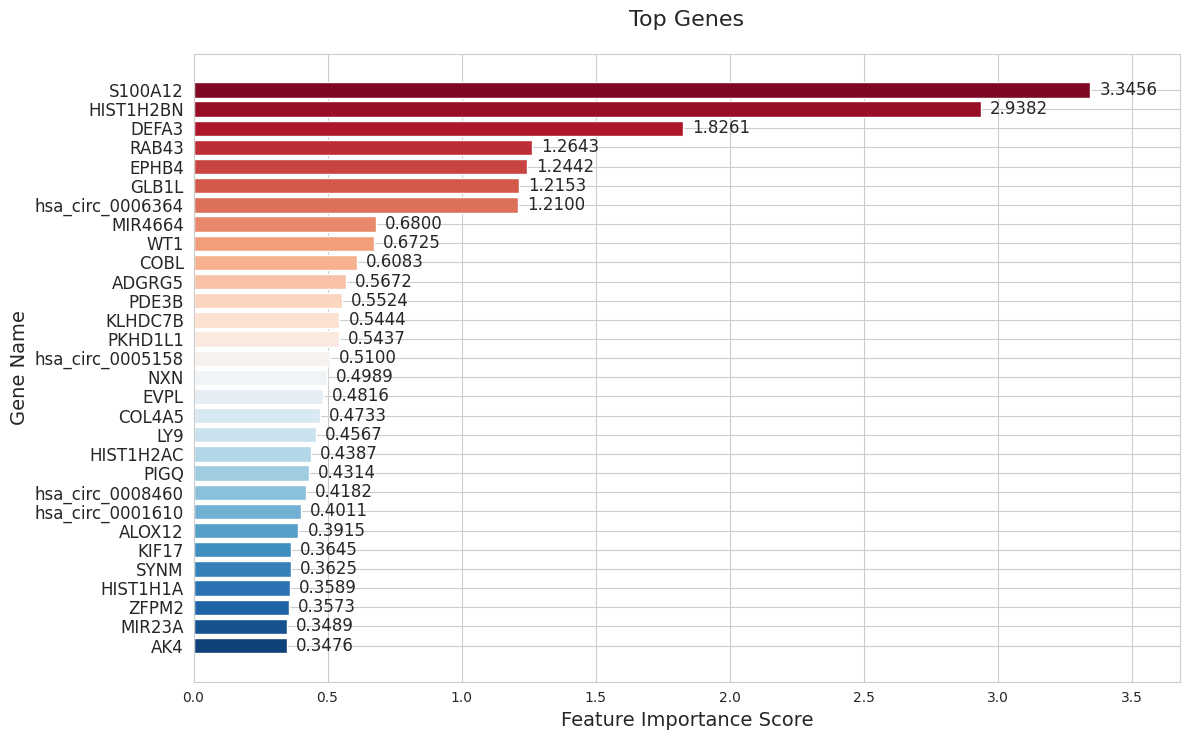

In [25]:
from src.plotting.feature_importance_plot import plot_top_genes

_ = plot_top_genes(
    fi_nn,
    n_genes=30, 
    title="Top Genes",
    save_file="plots/risk/mds_risk_fi_mrna_only.png"
)

In [26]:
mrna_dict = {}
mirna_dict = {}
circrna_dict = {}

# go trough the fi_nn dict and sort it into three lists of mrna, mirna and circrna
for k, v in fi_nn.items():
    if k.startswith("MIR"):
        mirna_dict[k] = v
    elif k.startswith("hsa_circ"):
        circrna_dict[k] = v
    else:
        mrna_dict[k] = v

# keep only top 30 out of each list
n_top_genes = 60
mrna_dict = {k: v for k, v in sorted(mrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
mirna_dict = {k: v for k, v in sorted(mirna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
circrna_dict = {k: v for k, v in sorted(circrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}

In [27]:
mrna_genes = list(mrna_dict.keys())
mirna_genes = list(mirna_dict.keys())
circrna_names = list(circrna_dict.keys())

gg_A = gg_interactions(mrna_genes, mrna_genes)
pp_A = pp_interactions(mrna_genes, mrna_genes)
tf_links_A = tf_links(
    mrna_genes,
    mrna_genes,
    tflinksdb="interaction_data/TFLink_Homo_sapiens_interactions_SS_simpleFormat_v1.0.tsv",
    # tflinksdb="interaction_data/TFLink_Homo_sapiens_interactions_LS_simpleFormat_v1.0.tsv",
)
mrna_A = torch.logical_or(gg_A, pp_A).logical_or(tf_links_A).int()

mirna_gene_A = get_mirna_gene_interactions(mirna_genes, mrna_genes, mirna_mrna_db="interaction_data/mirna_genes_mrna.csv")

# interactions are in a shape of (mirnas, circrnas)
circrna_mirna_A = get_mirna_genes_circrna_interactions(
    mirna_names=mirna_genes,
    circrna_names=circrna_names,
    mirna_circrna_interactions="interaction_data/circrna_mirna_interactions_mirbase.csv",
)

mrna_A.sum(), mirna_gene_A.sum(), circrna_mirna_A.sum()

(tensor(30), tensor(43.), tensor(41.))

476


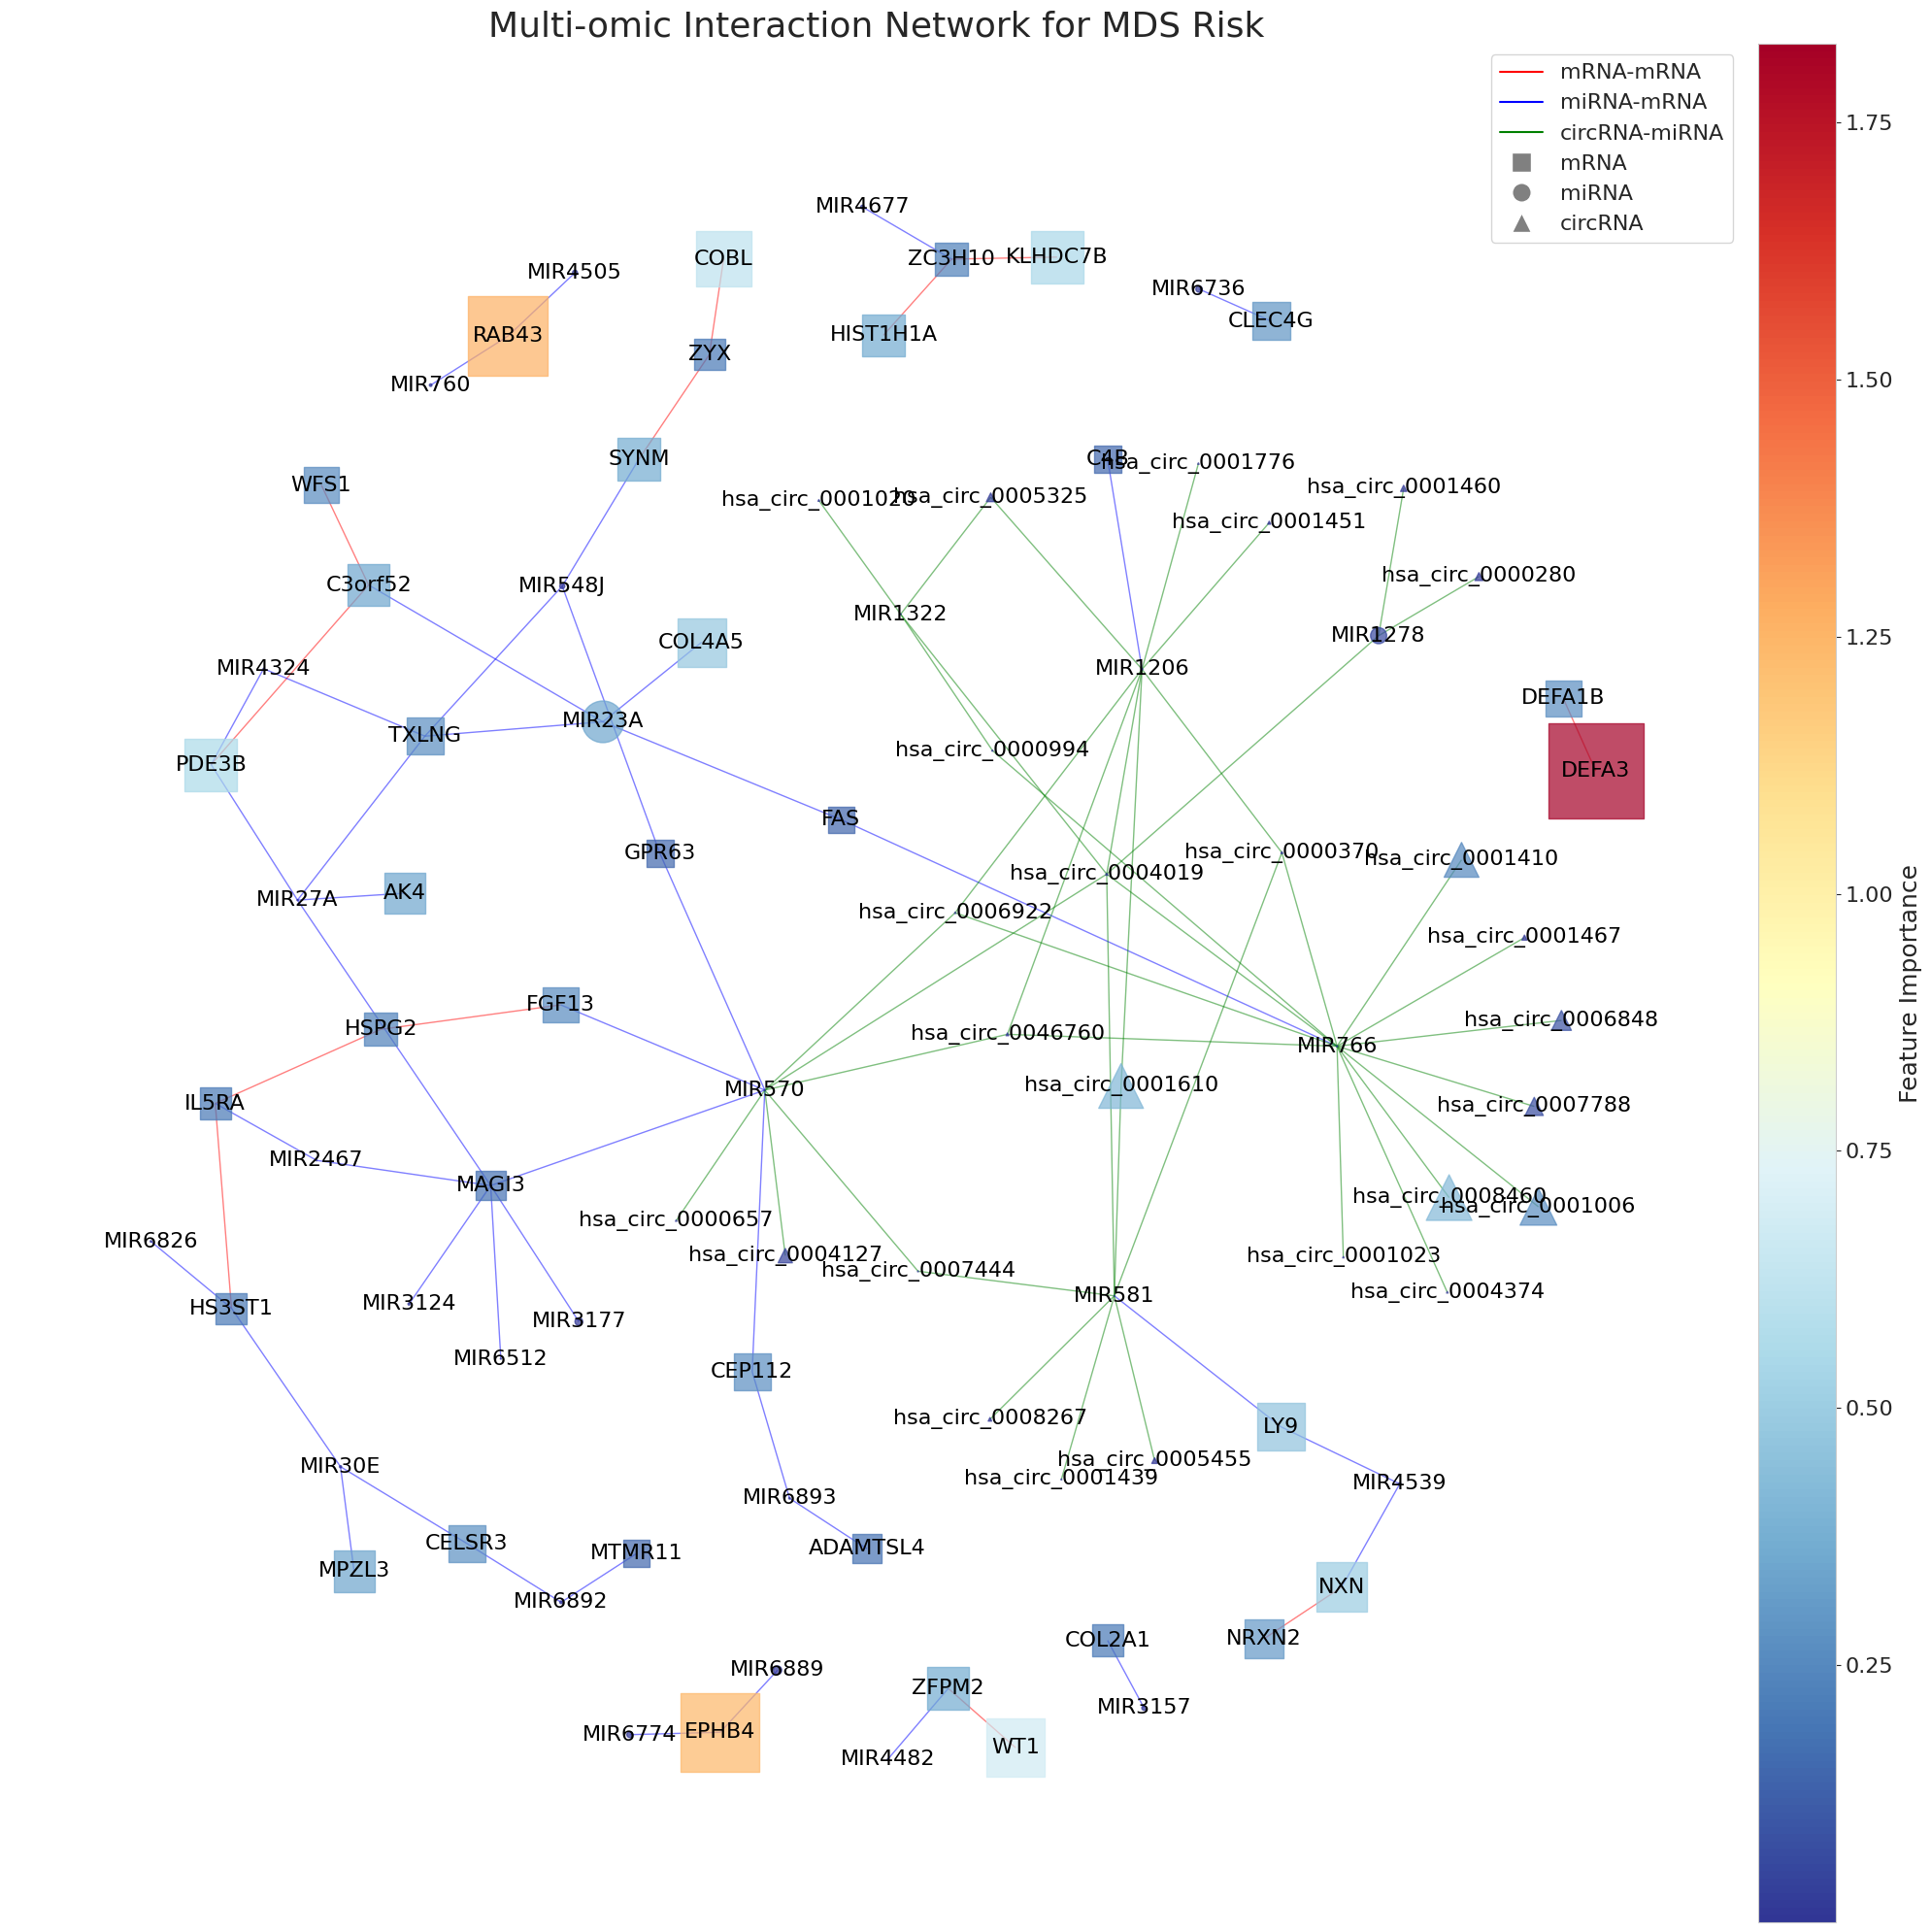

In [28]:
from src.plotting.graph_plotting import create_multi_omic_network, plot_multi_omic_network

# Example usage:
G = create_multi_omic_network(mrna_dict, mirna_dict, circrna_dict, 
                             mrna_A, mirna_gene_A, circrna_mirna_A)

# generate a random number
# seed = 8894 # 7306 - disease
# seed = 4580 # - risk
seed = np.random.randint(0, 10000)
print(seed)
fig = plot_multi_omic_network(
    G,
    seed=seed, 
    title="Multi-omic Interaction Network for MDS Risk",
    figsize=(20,20),
    max_iter=500,
    gravity=1.0,
    jitter_tolerance=2.0,
)
fig.savefig('plots/risk/multi_omic_network_genes_small.png', dpi=400)

- the DEFA gene family which has high scores here has been associated with different types of cancer but not with MDS it seems
- [Whole blood defensin mRNA expression is a predictive biomarker of docetaxel response in castration-resistant prostate cancer](https://pmc.ncbi.nlm.nih.gov/articles/PMC4527520/) 
- [S100A12 is a promising biomarker in papillary thyroid cancer](https://www.nature.com/articles/s41598-020-58534-1)
- [S100A8, S100A9 and S100A12 are strongly correlated with the occurrence and development of cancer](https://onlinelibrary.wiley.com/doi/10.1111/imm.13722)
- [S100A9 induces differentiation of acute myeloid leukemia cells through TLR4](https://pubmed.ncbi.nlm.nih.gov/28137827/)
- [S100 Proteins in Acute Myeloid Leukemia](https://pubmed.ncbi.nlm.nih.gov/30366122/)
- [Roles of Histone Deacetylases in Acute Myeloid Leukemia With Fusion Proteins](https://pmc.ncbi.nlm.nih.gov/articles/PMC8440836/) and [https://eurjmedres.biomedcentral.com/articles/10.1186/s40001-024-02108-8](https://eurjmedres.biomedcentral.com/articles/10.1186/s40001-024-02108-8)
- we have three histone genes here as important features
    - HIST1H2BN 4.245093017816544
    - HIST1H2AC 1.6199357211589813
    - HIST1H1A 1.2683670080441516

In [51]:
fig.savefig('plots/risk/multi_omic_network.png', dpi=400)

<Figure size 640x480 with 0 Axes>

[MiR-570 inhibits cell proliferation and glucose metabolism by targeting IRS1 and IRS2 in human chronic myelogenous leukemia](https://pmc.ncbi.nlm.nih.gov/articles/PMC5478775/)

In [ ]:
import gseapy as gp

mrna_dict = {}
mirna_dict = {}
circrna_dict = {}

# go trough the fi_nn dict and sort it into three lists of mrna, mirna and circrna
for k, v in fi_nn.items():
    if k.startswith("MIR"):
        mirna_dict[k] = v
    elif k.startswith("hsa_circ"):
        circrna_dict[k] = v
    else:
        mrna_dict[k] = v

n_top_genes = 100
mrna_dict_enrich = {k: v for k, v in sorted(mrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
mrna_genes_enrich = list(mrna_dict.keys())
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(
    gene_list=mrna_genes_enrich, # or "./tests/data/gene_list.txt",
    gene_sets=['BioPlanet_2019','KEGG_2021_Human', 'Elsevier_Pathway_Collection', 'WikiPathways_2024_Human', 'Reactome_Pathways_2024'],
    organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
    outdir=None, # don't write to disk
)
# select by Adjusted P-value < 0.05
results = pl.DataFrame(enr.results)
significant_results = (
    results
    .filter(pl.col("Adjusted P-value") < 0.05)
    .select(["Gene_set", "Term", "Adjusted P-value", "Genes"])
    .sort("Adjusted P-value")
)
significant_results = significant_results

with pl.Config(tbl_rows=-1, tbl_cols=-1, tbl_width_chars=200, fmt_str_lengths=1000, set_tbl_formatting='ASCII_FULL'):
    print(significant_results.head(15))

shape: (15, 4)
+-----------------------------+---------------------------------------------------+------------------+-------------------------------------------------------------------------------------------------+
| Gene_set                    | Term                                              | Adjusted P-value | Genes                                                                                           |
| ---                         | ---                                               | ---              | ---                                                                                             |
| str                         | str                                               | f64              | str                                                                                             |
+====================================================================================================================================================================================

In [30]:
import gseapy as gp

mrna_dict = {}
mirna_dict = {}
circrna_dict = {}

# go trough the fi_nn dict and sort it into three lists of mrna, mirna and circrna
for k, v in fi_nn.items():
    if k.startswith("MIR"):
        mirna_dict[k] = v
    elif k.startswith("hsa_circ"):
        circrna_dict[k] = v
    else:
        mrna_dict[k] = v

n_top_genes = 100
mrna_dict_enrich = {k: v for k, v in sorted(mrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
mrna_genes_enrich = list(mrna_dict.keys())
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(
    gene_list=mrna_genes_enrich, # or "./tests/data/gene_list.txt",
    gene_sets=[
        "GO_Biological_Process_2023",
        "GO_Molecular_Function_2023",
        "GO_Cellular_Component_2023",
        # "Jensen_DISEASES",
        # "Human_Phenotype_Ontology"
    ],
    organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
    outdir=None, # don't write to disk
)

# select by Adjusted P-value < 0.05
results = pl.DataFrame(enr.results)
significant_results = results.filter(pl.col("Adjusted P-value") < 0.05)

significant_results = significant_results.select(["Gene_set", "Term", "Adjusted P-value", "Genes"]).sort("Adjusted P-value")

with pl.Config(tbl_rows=-1, tbl_cols=-1, tbl_width_chars=200, fmt_str_lengths=200, set_tbl_formatting='ASCII_FULL'):
    print(significant_results.head(15))

shape: (15, 4)
+----------------------------+---------------------------------------------------------------------------+------------------+--------------------------------------------------------------------------+
| Gene_set                   | Term                                                                      | Adjusted P-value | Genes                                                                    |
| ---                        | ---                                                                       | ---              | ---                                                                      |
| str                        | str                                                                       | f64              | str                                                                      |
+====================================================================================================================================================================================